In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np

# Read the contents of the file
with open("matrix_mult_benchmark_63512.out", "r") as file:
    content = file.read()

# Extract the relevant data using regular expressions
pattern = r"Running (ex1(?:-improved)?) with (\d+) threads.*?time: (\d+\.\d+) seconds"
matches = re.findall(pattern, content, re.DOTALL)

# Organize the data into a dictionary
data = {}
for variant, threads, time in matches:
    if variant not in data:
        data[variant] = {}
    if threads not in data[variant]:
        data[variant][threads] = []
    data[variant][threads].append(float(time))

# Calculate the average time and standard deviation for each variant and number of threads
avg_data = {}
std_data = {}
for variant in data:
    avg_data[variant] = {}
    std_data[variant] = {}
    for threads in data[variant]:
        avg_data[variant][threads] = sum(data[variant][threads]) / len(data[variant][threads])
        std_data[variant][threads] = np.std(data[variant][threads])

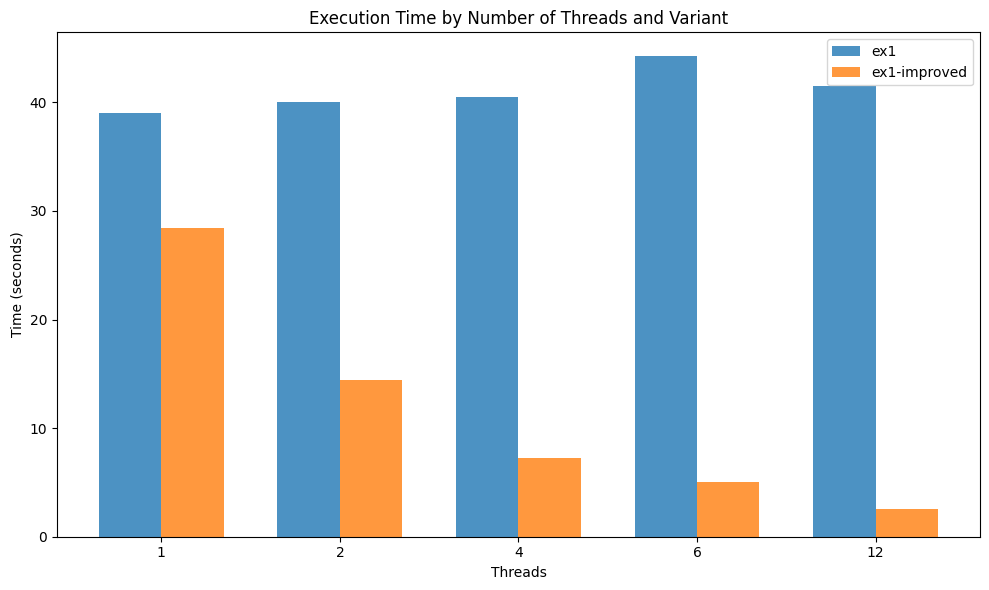

In [2]:
# Create the execution time plot
fig, ax = plt.subplots(figsize=(10, 6))

x = sorted(list(set([int(t) for v in data for t in data[v]])))
width = 0.35
opacity = 0.8

for i, variant in enumerate(avg_data):
    y = [avg_data[variant].get(str(t), 0) for t in x]
    ax.bar([p + i * width for p in range(len(x))], y, width, alpha=opacity, label=variant)

ax.set_xlabel("Threads")
ax.set_ylabel("Time (seconds)")
ax.set_title("Execution Time by Number of Threads and Variant")
ax.set_xticks([p + width/2 for p in range(len(x))])
ax.set_xticklabels(x)
ax.legend()

plt.tight_layout()
plt.show()

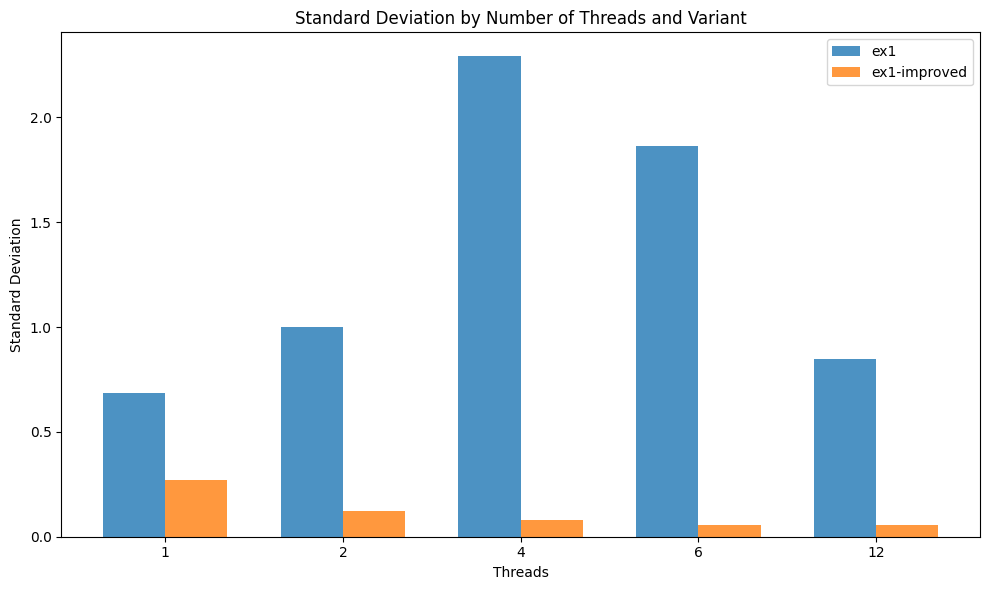

In [3]:
# Create the standard deviation plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, variant in enumerate(std_data):
    y = [std_data[variant].get(str(t), 0) for t in x]
    ax.bar([p + i * width for p in range(len(x))], y, width, alpha=opacity, label=variant)

ax.set_xlabel("Threads")
ax.set_ylabel("Standard Deviation")
ax.set_title("Standard Deviation by Number of Threads and Variant")
ax.set_xticks([p + width/2 for p in range(len(x))])
ax.set_xticklabels(x)
ax.legend()

plt.tight_layout()
plt.show()


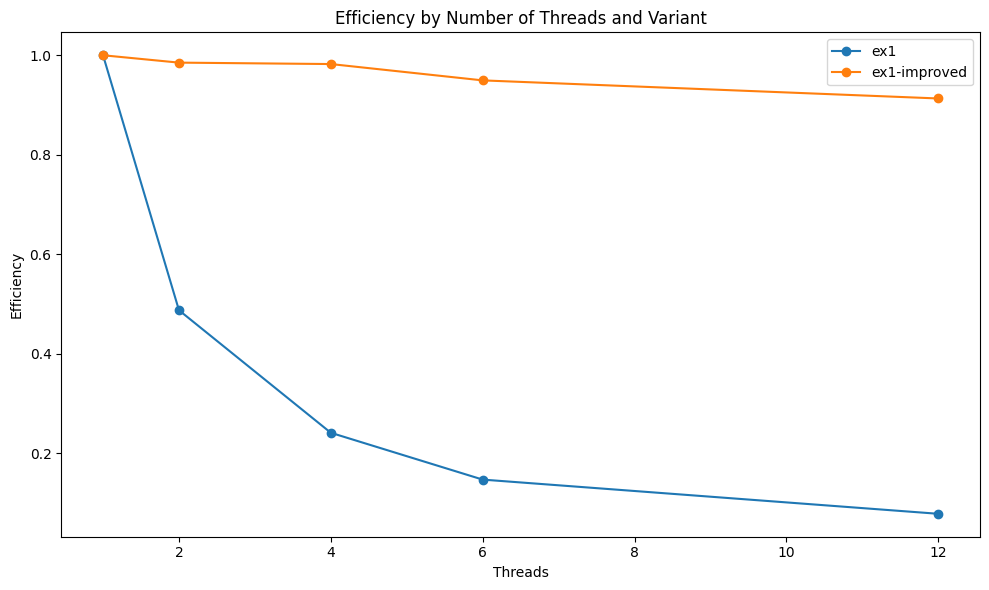

In [4]:

# Calculate the efficiency for each variant and number of threads
efficiency_data = {}
for variant in avg_data:
    efficiency_data[variant] = {}
    for threads in avg_data[variant]:
        efficiency_data[variant][threads] = avg_data[variant]["1"] / (int(threads) * avg_data[variant][threads])

# Create the efficiency plot
fig, ax = plt.subplots(figsize=(10, 6))

for variant in efficiency_data:
    x = [int(t) for t in efficiency_data[variant]]
    y = [efficiency_data[variant][str(t)] for t in x]
    ax.plot(x, y, marker="o", label=variant)

ax.set_xlabel("Threads")
ax.set_ylabel("Efficiency")
ax.set_title("Efficiency by Number of Threads and Variant")
ax.legend()

plt.tight_layout()
plt.show()